In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

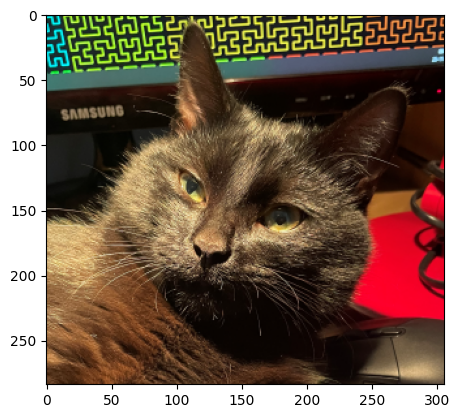

In [2]:
img = plt.imread("../datasets/image_sample/kat.png")

plt.imshow(img)

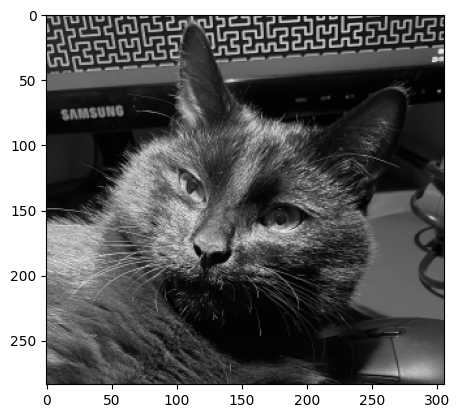

In [3]:
gray_img = img.sum(-1)/4
plt.imshow(gray_img, cmap='gray')

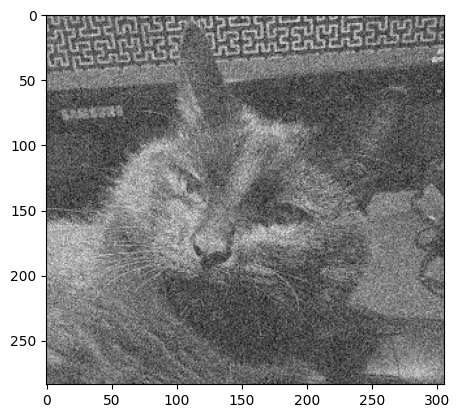

In [4]:
noisy_img = gray_img + 0.1*np.random.randn(*gray_img.shape)

plt.imshow(noisy_img, cmap='gray')

In [46]:
X.shape[0]*d + X.shape[1]*d, X.shape[0]*X.shape[1]

(118000, 86904)

In [49]:
X = torch.tensor(gray_img, dtype=torch.float)

d = 2000

D = torch.randn(X.shape[0], d, requires_grad=True)
R = torch.randn(d, X.shape[1], requires_grad=True)

optim = torch.optim.SGD([D, R], lr=0.05)

lam = 0.01

for i in range(10000):
    
    loss = torch.mean((X - D @ R)**2) + lam * torch.norm(R, p=1)
    print(i, loss.item())

    optim.zero_grad()
    loss.backward()
    optim.step()


0 6912.30029296875
1 6884.58984375
2 6857.21044921875
3 6830.17724609375
4 6803.42041015625
5 6777.015625
6 6750.90771484375
7 6725.10107421875
8 6699.59326171875
9 6674.38037109375
10 6649.44921875
11 6624.82275390625
12 6600.46533203125
13 6576.384765625
14 6552.5927734375
15 6529.0498046875
16 6505.7734375
17 6482.7626953125
18 6460.01171875
19 6437.509765625
20 6415.25634765625
21 6393.2529296875
22 6371.4990234375
23 6349.9638671875
24 6328.6728515625
25 6307.60888671875
26 6286.7734375
27 6266.1640625
28 6245.77685546875
29 6225.61181640625
30 6205.64453125
31 6185.9033203125
32 6166.3671875
33 6147.03125
34 6127.91015625
35 6108.9697265625
36 6090.2412109375
37 6071.6953125
38 6053.34716796875
39 6035.19189453125
40 6017.216796875
41 5999.41748046875
42 5981.810546875
43 5964.3779296875
44 5947.1201171875
45 5930.0263671875
46 5913.1083984375
47 5896.37158203125
48 5879.79296875
49 5863.36669921875
50 5847.1123046875
51 5831.00927734375
52 5815.07177734375
53 5799.2861328125
54 

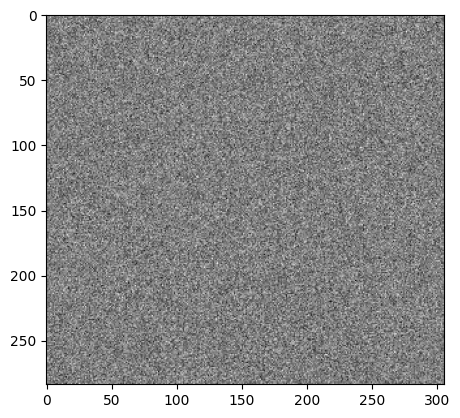

In [50]:
reshaped_D = (D @ R).detach().numpy()

plt.imshow(reshaped_D, cmap='gray')
plt.show()
